

> the code is ran on kaggle




In [ ]:
!pip install ultralytics

In [ ]:
import os
train_data_description = os.listdir("/kaggle/input/applai-cv-st23-assignment-4/train")
test_data_description = os.listdir("/kaggle/input/applai-cv-st23-assignment-4/test")

train_annotation_file_paths = [os.path.join("/kaggle/input/applai-cv-st23-assignment-4/train",i) for i in train_data_description if '.xml' in i]
train_image_file_paths = [os.path.join("/kaggle/input/applai-cv-st23-assignment-4/train",i) for i in train_data_description if '.jpg' in i]

In [ ]:
from shutil import copytree, ignore_patterns
copytree("/kaggle/input/applai-cv-st23-assignment-4/train",'/kaggle/working/object_detection/train/images/',ignore = ignore_patterns('*.xml'))

'/kaggle/working/object_detection/train/images/'

In [ ]:
os.makedirs(os.path.join('/kaggle/working/object_detection/','train/labels'))

In [ ]:
import xml.etree.ElementTree as ET
def convert_xml_to_txt(label_path,xml_file,class_dict,destination_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    x=root.find('filename').text
    txt_file = x.replace('.jpg','.txt')
    txt_file = os.path.join(destination_file,txt_file)
    with open(txt_file,'w') as f:
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name not in class_dict:
                continue
            class_id = class_dict[class_name]
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            xmax = int(bbox.find('xmax').text)
            ymin = int(bbox.find('ymin').text)
            ymax = int(bbox.find('ymax').text)

            image_width = int(root.find('size/width').text)
            image_height = int(root.find('size/height').text)

            x_center = (xmin + xmax) / 2 / image_width if image_width != 0 else (xmin + xmax) / 2
            y_center = (ymin + ymax) / 2 / image_height if image_height != 0 else (ymin + ymax) / 2
            width = (xmax - xmin) / image_width if image_width != 0 else (xmax - xmin)
            height = (ymax - ymin) / image_height if image_height != 0 else (ymax - ymin)

            line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
            f.write(line)

In [ ]:
class_dict = {'apple':0,'banana':1,'orange':2}


dest_path = '/kaggle/working/object_detection/train/labels/'
for i in train_annotation_file_paths:
    convert_xml_to_txt("/kaggle/input/applai-cv-st23-assignment-4/train",i,class_dict,dest_path)

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
os.makedirs(os.path.join('/kaggle/working/object_detection/','val/labels'))
os.makedirs(os.path.join('/kaggle/working/object_detection/','val/images'))

In [ ]:
import random
import shutil

source_folder = '/kaggle/working/object_detection/train/images'
destination_folder = '/kaggle/working/object_detection/val/images'
num_files_to_move = 30

file_names = os.listdir(source_folder)
random_files = random.sample(file_names, num_files_to_move)

for file_name in random_files:
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)
    shutil.move(source_path, destination_path)

source_folder = '/kaggle/working/object_detection/train/labels'
destination_folder = '/kaggle/working/object_detection/val/labels'

for file_name in random_files:
    tmp = file_name.replace('.jpg', '.txt')
    source_path = os.path.join(source_folder, tmp)
    destination_path = os.path.join(destination_folder, tmp)
    shutil.move(source_path, destination_path)

In [ ]:
import yaml
data = {
    'path': '/kaggle/working/object_detection/',
    'train': 'train/images',
    'val': 'val/images',
    'names': {
        0: 'apple',
        1: 'banana',
        2: 'orange'
    }
}
with open('data.yaml', 'w') as yaml_file:
    yaml.dump(data, yaml_file)

In [ ]:
pip install wandb

Note: you may need to restart the kernel to use updated packages.


In [ ]:
wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
results = model.train(data='/kaggle/working/data.yaml', epochs=50, batch=4)

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data.yaml, epochs=50, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

In [ ]:
Test_image_results = model('/kaggle/input/applai-cv-st23-assignment-4/train/mixed_1.jpg')


image 1/1 /kaggle/input/applai-cv-st23-assignment-4/train/mixed_1.jpg: 480x640 1 apple, 1 banana, 1 orange, 6.9ms
Speed: 2.5ms preprocess, 6.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
Test_image_results[0].boxes.data.tolist()

[[218.20452880859375,
  84.58545684814453,
  472.0813293457031,
  337.85369873046875,
  0.9637323617935181,
  2.0],
 [49.419403076171875,
  222.85263061523438,
  664.775146484375,
  512.9285278320312,
  0.9216649532318115,
  1.0],
 [434.33935546875,
  142.28814697265625,
  671.1337280273438,
  417.61102294921875,
  0.9179354310035706,
  0.0]]

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/applai-cv-st23-assignment-4/train/mixed_1.jpg')
copy_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img_dict = {0:'apple',1:'banana',2:'orange'}

for bbox in Test_image_results[0].boxes.data.tolist():
    x1, y1, x2, y2,confidence,label = bbox
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, img_dict[int(label)], (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

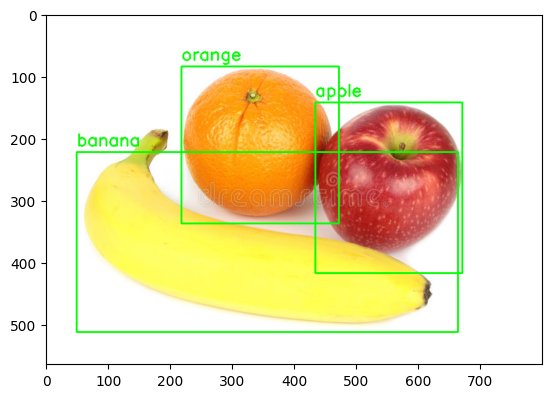

In [ ]:
plt.imshow(image_rgb)

In [ ]:
import pandas as pd

output = pd.read_csv('/kaggle/input/applai-cv-st23-assignment-4/submission.csv')
output.head()

,ImageID,PredictionString
0,apple_77,NaN
1,apple_78,NaN
2,apple_79,NaN
3,apple_80,NaN
4,apple_81,NaN


In [ ]:
for idx, row in output.iterrows():
    img = os.path.join('/kaggle/input/applai-cv-st23-assignment-4/test',row['ImageID']+'.jpg')
    Test_image_results = model(img)
    ans=''
    for i in range(len(Test_image_results[0].boxes)):
        result = Test_image_results[0].boxes[i]
        if round(result.conf[0].item())==0:
            continue
        ans+=img_dict[result.cls[0].item()]+' '
        ans+=str(round(result.conf[0].item()))+' '
        lst = [str(round(item)) for item in result.xyxy[0].tolist()]
        ans+=' '.join(lst)
        ans+=';'
    ans=ans[:-2]
    output.at[idx, 'PredictionString'] = ans
output.head()


image 1/1 /kaggle/input/applai-cv-st23-assignment-4/test/apple_77.jpg: 512x640 5 apples, 11.0ms
Speed: 3.9ms preprocess, 11.0ms inference, 2.5ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /kaggle/input/applai-cv-st23-assignment-4/test/apple_78.jpg: 640x640 1 apple, 12.6ms
Speed: 2.9ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

libpng warning: iCCP: known incorrect sRGB profile
image 1/1 /kaggle/input/applai-cv-st23-assignment-4/test/apple_79.jpg: 640x640 1 apple, 6.0ms
Speed: 2.5ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/applai-cv-st23-assignment-4/test/apple_80.jpg: 544x640 1 apple, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 /kaggle/input/applai-cv-st23-assignment-4/test/apple_81.jpg: 640x576 1 apple, 6.9ms
Speed: 3.0ms preprocess, 6.9ms inference, 1.6ms postprocess per image at shape (1, 3,

,ImageID,PredictionString
0,apple_77,apple 1 71 59 176 162;apple 1 11 18 98 109;app...
1,apple_78,apple 1 18 12 349 33
2,apple_79,apple 1 66 178 657 72
3,apple_80,apple 1 156 105 458 44
4,apple_81,apple 1 71 394 1457 169


In [ ]:
output.to_csv('output.csv', index=False)